# Importing and Pre-processing Data

## Data Source

[Used Car sets Data - Kaggle](https://www.kaggle.com/datasets/sukhmanibedi/cars4u)

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 30)

## Importing Data Set

In [4]:
df = pd.read_csv("data/used_cars_data.csv")

## Checking information about data

In [5]:
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The data set has 7253 rows and 14 columns.


In [6]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [8]:
# Checking data types, missing values and number of records in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


__Data has missing values in Mileage, Engine, Poer, Seats, New_Price & Price__

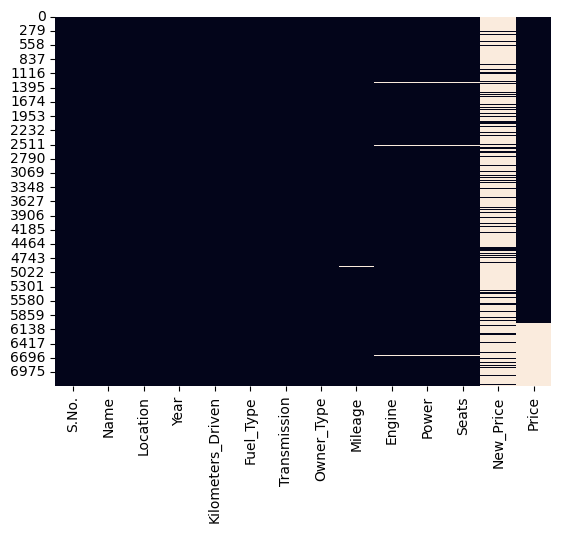

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64


In [9]:
# Visualizing missing records
sns.heatmap(df.isnull(), cbar= False)
plt.show()

# Checking for number of missing values in each column
print(df.isnull().sum())

In [10]:
# Checking percentage of missing values in each column
round((df.isnull().mean()*100),2)

S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64

<a id='missing-values'></a>
86% missing values in __New Price__ <br>
17% missing values in __Price__ <br>
<1% missing values in __Mileage, Engine, Power and Seats__ 

In [11]:
# Checking for duplication
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

__Fuel_Type, Transmission, Owner_Type__ could as well be categorical variables since they have limited values and can specify specifying a category of vehicle by virtue of features or ownership

In [12]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [13]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

## Defining Index

In [15]:
# Could also drop S.No. as pre-defined index provides same accessibility
df.set_index("S.No.", inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Feature Engineering
*Creating Custom features basis available data*

### Creating Age of the car

In [16]:
from datetime import date

In [17]:
df["Car_Age"] = date.today().year - df["Year"]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10


### Extracting Brand & Model of Car

In [18]:
df["Brand"] = df["Name"].str.split().str.get(0)
df["Model"] = df["Name"].str.split().str.get(1)
df[["Name", "Brand", "Model"]]

,Name,Brand,Model
S.No.,,,
0,Maruti Wagon R LXI CNG,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta
2,Honda Jazz V,Honda,Jazz
3,Maruti Ertiga VDI,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento
7249,Volkswagen Polo GT TSI,Volkswagen,Polo
7250,Nissan Micra Diesel XV,Nissan,Micra


## Cleaning data

### Cleaning Brand Name

In [19]:
print(("Current Data set has {0} unique brand names \n").format(df["Brand"].nunique()))
print(df["Brand"].unique())

Current Data set has 33 unique brand names 

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


- __"Land", "Mini" appear to be incorrect as there are no brands by these names__
- __"ISUZU/Isuzu" is the same Brand with typo difference__

In [20]:
# Filtering the records for which Brand name needs to be cleaned
incorrect_model_name = ["Land", "Mini", "ISUZU", "Isuzu"]
filt = df["Brand"].str.contains("|".join(incorrect_model_name), case= False)
df.loc[filt, ["Name", "Brand", "Model"]]

,Name,Brand,Model
S.No.,,,
13,Land Rover Range Rover 2.2L Pure,Land,Rover
14,Land Rover Freelander 2 TD4 SE,Land,Rover
176,Mini Countryman Cooper D,Mini,Countryman
191,Land Rover Range Rover 2.2L Dynamic,Land,Rover
228,Mini Cooper Convertible S,Mini,Cooper
...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,ISUZU,D-MAX
7132,Mini Clubman Cooper S,Mini,Clubman
7157,Land Rover Range Rover 2.2L Pure,Land,Rover


In [21]:
# Replacing incorrect brand names with correct name
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper", "Land": "Land Rover"}, inplace= True)
df.loc[filt, ["Name", "Brand", "Model"]]

,Name,Brand,Model
S.No.,,,
13,Land Rover Range Rover 2.2L Pure,Land Rover,Rover
14,Land Rover Freelander 2 TD4 SE,Land Rover,Rover
176,Mini Countryman Cooper D,Mini Cooper,Countryman
191,Land Rover Range Rover 2.2L Dynamic,Land Rover,Rover
228,Mini Cooper Convertible S,Mini Cooper,Cooper
...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Isuzu,D-MAX
7132,Mini Clubman Cooper S,Mini Cooper,Clubman
7157,Land Rover Range Rover 2.2L Pure,Land Rover,Rover


### Extracting numeric value of Mileage

In [22]:
# Splitting numeric value of Mileage from its unit
df["Mileage_Unit"] = df["Mileage"].str.split().str.get(1)
df["Mileage"] = df["Mileage"].str.split().str.get(0)
df["Mileage"] = df["Mileage"].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,13,Maruti,Wagon,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,8,Hyundai,Creta,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12,Honda,Jazz,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,10,Audi,A4,kmpl


#### Checking different units of mileage and its frequency
<a id='mileage-units'></a>

In [23]:
print(f'Mileage is specified in {df["Mileage_Unit"].unique()} units with below frequency:\n')
print(df["Mileage_Unit"].value_counts())

Mileage is specified in ['km/kg' 'kmpl' nan] units with below frequency:

Mileage_Unit
kmpl     7177
km/kg      74
Name: count, dtype: int64


### Extracting numeric value of Engine

In [24]:
# replacing null with np.nan
df["Engine"].replace("null", np.nan, inplace=True)

In [25]:
# Splitting numeric value of Engine from its unit
df["Engine_Unit"] = df["Engine"].str.split().str.get(1)
df["Engine"] = df["Engine"].str.split().str.get(0)
df["Engine"] = df["Engine"].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit,Engine_Unit
S.No.,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,NaN,1.75,13,Maruti,Wagon,km/kg,CC
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50,8,Hyundai,Creta,kmpl,CC
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50,12,Honda,Jazz,kmpl,CC
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl,CC
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74,10,Audi,A4,kmpl,CC


In [26]:
print(f'Engine Capcity is expressed in {df["Engine_Unit"].unique()} units')

Engine Capcity is expressed in ['CC' nan] units


<a id='engine-units'></a>
__Dropping column "Engine_Unit" since all values are in CC__ (Ignoring na values)

In [27]:
df.drop("Engine_Unit", axis = "columns", inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,NaN,1.75,13,Maruti,Wagon,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50,8,Hyundai,Creta,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50,12,Honda,Jazz,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74,10,Audi,A4,kmpl


### Extracting numeric value of Power

In [28]:
# Splitting numeric value of Power from its unit
df["Power_Unit"] = df["Power"].str.split().str.get(1)
df["Power"] = df["Power"].str.split().str.get(0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit,Power_Unit
S.No.,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,Wagon,km/kg,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50,8,Hyundai,Creta,kmpl,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61 Lakh,4.50,12,Honda,Jazz,kmpl,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74,10,Audi,A4,kmpl,bhp


In [29]:
print(f'Power is expressed in {df["Power_Unit"].unique()} units')

Power is expressed in ['bhp' nan] units


<a id='Power-units'></a>
__Dropping column "Power" since all values are in bhp__ (Ignoring na values)

In [30]:
df.drop("Power_Unit", axis = "columns", inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,Wagon,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50,8,Hyundai,Creta,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61 Lakh,4.50,12,Honda,Jazz,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74,10,Audi,A4,kmpl


*"Power" column contains some null values and cannot be directly coerced to float datatype*

In [31]:
# replacing null with np.nan
df["Power"].replace("null", np.nan, inplace=True)

In [32]:
# Converting power to float type for analysis as continuous distribution
df["Power"] = df["Power"].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,Wagon,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8,Hyundai,Creta,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,12,Honda,Jazz,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10,Audi,A4,kmpl


### Extracting numeric value of "New_Price"

In [33]:
# replacing null with np.nan
df["New_Price"].replace("null", np.nan, inplace=True)

In [34]:
df["New_Price_Unit"] = df["New_Price"].str.split().str.get(1)
df["New_Price"] = df["New_Price"].str.split().str.get(0)
df["New_Price"] = df["New_Price"].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit,New_Price_Unit
S.No.,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,Wagon,km/kg,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8,Hyundai,Creta,kmpl,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12,Honda,Jazz,kmpl,Lakh
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10,Audi,A4,kmpl,NaN


In [35]:
print(f'New_Price coulmn has {df["New_Price_Unit"].unique()} units')

New_Price coulmn has [nan 'Lakh' 'Cr'] units


<a id='price-units'></a>
__Units of New Price are in Lakh and Crore, hence converting all values to Lakhs to standardise units__ (Ignoring na)

In [36]:
filt = (df["New_Price_Unit"] == "Cr")
df.loc[filt, "New_Price"] *=100

__Dropping column "New_Price" since all values are now in Lakh__ (Ignoring na values)

In [37]:
df.drop("New_Price_Unit", axis="columns", inplace=True)
df.head(n=4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,Wagon,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8,Hyundai,Creta,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12,Honda,Jazz,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl


<a id='resale-price'></a>
- __"Price" column refers to resale price of the car__<br>
- Renaming the column accordingly<br>
- Unit for resale price not given, assuming it is in lakh

In [38]:
df.rename(columns={"Price":"Resale_Price"}, inplace=True)
df.head(n=4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Resale_Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,Wagon,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8,Hyundai,Creta,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12,Honda,Jazz,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,Ertiga,kmpl


### Separating Numerical and Categorical variables

In [39]:
categorical_col_list = df.select_dtypes(include=[object]).columns.to_list()
numerical_col_list = df.select_dtypes(include=[np.number]).columns.to_list()

print(f"Categorical Variables: {categorical_col_list}")
print(f"Numerical Variables: {numerical_col_list}")

Categorical Variables: ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model', 'Mileage_Unit']
Numerical Variables: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Resale_Price', 'Car_Age']


### Imputing rows with Missing Values

In [40]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Resale_Price         1234
Car_Age                 0
Brand                   0
Model                   0
Mileage_Unit            2
dtype: int64

In [41]:
round(df.isnull().mean()*100,2)

Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 2.41
Seats                 0.73
New_Price            86.13
Resale_Price         17.01
Car_Age               0.00
Brand                 0.00
Model                 0.00
Mileage_Unit          0.03
dtype: float64

#### Mileage

In [42]:
print(f"Mileage has {df.loc[(df['Mileage'].isnull()),'Mileage'].isnull().sum()} null values")

Mileage has 2 null values


In [43]:
# Assuming "kmpl" as common unit for mileage
df["Mileage_Unit"] = df["Mileage_Unit"].fillna("kmpl")
df.loc[df["Mileage_Unit"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Resale_Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,


In [44]:
print(df["Mileage"].describe())
print(df["Mileage"].skew())

count    7251.000000
mean       18.141580
std         4.562197
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64
-0.4383205657235177


*__Mileage distribution is slightly left skewed, hence choosing Median as central tendency for imputation__*

In [45]:
# using median at Brand and Model level granularity to impute
medians = df.groupby(["Brand", "Model"])["Mileage"].transform("median")
df["Mileage"] = df["Mileage"].fillna(medians)
print(f"Data has {df['Mileage'].isnull().sum()} rows with null values for Mileage")

Data has 2 rows with null values for Mileage


In [46]:
# using median at Fuel Type, Power and Engine Capacity level granularity to impute as they impact Mileage
medians = df.groupby(["Fuel_Type", "Power", "Engine"])["Mileage"].transform("median")
df["Mileage"] = df["Mileage"].fillna(medians)
print(f"Data has {df['Mileage'].isnull().sum()} rows with null values for Mileage")

Data has 2 rows with null values for Mileage


In [47]:
# Grouping by Brand, Transmission, Fuel_Type for imputing remaining values for Mileage
medians = df.groupby(["Brand", "Transmission", "Seats"])["Mileage"].transform("median")
df["Mileage"] = df["Mileage"].fillna(medians)
print(f"Data has {df['Mileage'].isnull().sum()} rows with null values for Mileage")

Data has 1 rows with null values for Mileage


In [48]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Resale_Price         1234
Car_Age                 0
Brand                   0
Model                   0
Mileage_Unit            0
dtype: int64

#### Power

In [49]:
print(f"Power has {df['Power'].isnull().sum()} null values")

Power has 175 null values


In [50]:
print(df["Power"].describe())
print(df["Power"].skew())

count    7078.000000
mean      112.765214
std        53.493553
min        34.200000
25%        75.000000
50%        94.000000
75%       138.100000
max       616.000000
Name: Power, dtype: float64
1.9611776307277349


*__Power distribution is moderately right skewed, hence choosing Median as central tendency for imputation__*

In [51]:
df.loc[df["Power"].isnull(), "Name"].value_counts()

Name
Maruti Swift VDI BSIV                      12
Toyota Etios GD                             8
Maruti Swift 1.3 VXi                        8
Toyota Etios Liva GD                        8
Hyundai Santro Xing XL eRLX Euro III        7
                                           ..
Hyundai Santro Xing XO CNG                  1
Maruti Wagon R Vx                           1
Hyundai Santro GS                           1
Hyundai Santro GS zipDrive - Euro II        1
Hyundai Santro Xing XG AT eRLX Euro III     1
Name: count, Length: 78, dtype: int64

In [52]:
# using median at Name & Year level granularity to impute
medians = df.groupby(["Name", "Year"])["Power"].transform("median")
df["Power"] = df["Power"].fillna(medians)
print(f"Data has {df['Power'].isnull().sum()} rows with null values for Power")

Data has 162 rows with null values for Power


In [53]:
# using median at Model & Year level granularity to impute
medians = df.groupby(["Model", "Year"])["Power"].transform("median")
df["Power"] = df["Power"].fillna(medians)
print(f"Data has {df['Power'].isnull().sum()} rows with null values for Power")

Data has 52 rows with null values for Power


In [54]:
# using median at Brand & Model level granularity to impute
median = df.groupby(["Brand", "Model"])["Power"].transform("median")
df["Power"] = df["Power"].fillna(median)
print(f"Data has {df['Power'].isnull().sum()} rows with null values for Power")

Data has 12 rows with null values for Power


In [55]:
# using median at Fuel type, transmission & Engine level granularity to impute as they impact Power
median = df.groupby(["Fuel_Type", "Transmission", "Engine"])["Power"].transform("median")
df["Power"] = df["Power"].fillna(median)
print(f"Data has {df['Power'].isnull().sum()} rows with null values for Power")

Data has 7 rows with null values for Power


In [56]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 46
Power                   7
Seats                  53
New_Price            6247
Resale_Price         1234
Car_Age                 0
Brand                   0
Model                   0
Mileage_Unit            0
dtype: int64

#### Engine

In [57]:
print(f"Engine has {df['Engine'].isnull().sum()} null values")

Engine has 46 null values


In [58]:
print(df["Engine"].describe())
print(df["Engine"].skew())

count    7207.000000
mean     1616.573470
std       595.285137
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64
1.4124125381446186


*__Engine distribution is moderately right skewed, hence choosing Median as central tendency for imputation__*

In [59]:
df.loc[df["Engine"].isnull(), ["Name", "Year"]].value_counts()

Name                         Year
BMW 5 Series 520d Sedan      2012    3
Maruti Swift 1.3 VXi         2006    3
Toyota Etios Liva V          2012    2
Fiat Punto 1.4 Emotion       2010    2
BMW 5 Series 520d Sedan      2009    2
                                    ..
Honda CR-V AT With Sun Roof  2013    1
Fiat Punto 1.3 Emotion       2011    1
Fiat Punto 1.2 Dynamic       2017    1
BMW 5 Series 520d Sedan      2014    1
Hyundai Santro Xing XG       2005    1
Name: count, Length: 37, dtype: int64

In [60]:
# using median at Name & Year level granularity to impute
medians = df.groupby(["Name", "Year"])["Engine"].transform("median")
df["Engine"] = df["Engine"].fillna(medians)
print(f"Data has {df['Engine'].isnull().sum()} rows with null values for Engine")

Data has 45 rows with null values for Engine


In [61]:
df.groupby(["Model", "Year"])["Engine"].median()

Model    Year
1        2013    1995.0
         2015    1995.0
1.4Gsi   2005    1389.0
1000     1998     970.0
3        2007    1995.0
                  ...  
i20      2018    1197.0
         2019    1197.0
redi-GO  2016     799.0
         2017     799.0
         2018     799.0
Name: Engine, Length: 1223, dtype: float64

In [62]:
# Engine capacity for a model remained broadly stable across release years, 
# hence imputing with median at granularity of Model and Year
medians = df.groupby(["Model", "Year"])["Engine"].transform("median")
df["Engine"] = df["Engine"].fillna(medians)
print(f"Data has {df['Engine'].isnull().sum()} rows with null values for Engine")

Data has 7 rows with null values for Engine


In [63]:
# using median at Brand & Model level granularity to impute
medians = df.groupby(["Brand", "Model"])["Engine"].transform("median")
df["Engine"] = df["Engine"].fillna(medians)
print(f"Data has {df['Engine'].isnull().sum()} rows with null values for Engine")

Data has 0 rows with null values for Engine


In [64]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                  0
Power                   7
Seats                  53
New_Price            6247
Resale_Price         1234
Car_Age                 0
Brand                   0
Model                   0
Mileage_Unit            0
dtype: int64

#### Seats

In [65]:
print(f"Seats has {df['Seats'].isnull().sum()} null values")

Seats has 53 null values


In [66]:
print(df["Seats"].describe())
print(df["Seats"].skew())

count    7200.000000
mean        5.279722
std         0.811660
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64
1.9022619640428065


*__Seats distribution is moderately right skewed<br>
For imputation we shall use median value since seats anyways can't be in decimals__*

In [67]:
df[df["Seats"]==10]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Resale_Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.10,2446.0,75.0,10.0,NaN,3.50,19,Toyota,Qualis,kmpl
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07,1978.0,83.1,10.0,NaN,5.25,10,Tata,Sumo,kmpl
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.10,2446.0,75.0,10.0,NaN,3.65,21,Toyota,Qualis,kmpl
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.00,2446.0,75.0,10.0,NaN,3.50,19,Toyota,Qualis,kmpl
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.80,2499.0,80.0,10.0,NaN,5.50,8,Chevrolet,Tavera,kmpl
6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,12.20,1948.0,68.0,10.0,NaN,NaN,8,Tata,Sumo,kmpl
6288,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,14.80,2499.0,80.0,10.0,NaN,NaN,18,Chevrolet,Tavera,kmpl
6875,Toyota Qualis FS B3,Pune,2002,119613,Diesel,Manual,Second,13.10,2446.0,75.0,10.0,NaN,NaN,21,Toyota,Qualis,kmpl


10 Seats, despite being a outlier, is not a data entry issue on account of specific high end SUVs support 10 seats <br>

In [68]:
# using median at Name level granularity to impute
medians = df.groupby(["Name"])["Seats"].transform("median")
df["Seats"] = df["Seats"].fillna(medians)
print(f"Data has {df['Seats'].isnull().sum()} rows with null values for Seats")

Data has 46 rows with null values for Seats


In [69]:
# using median at Brand & Model level granularity to impute
medians = df.groupby(["Brand", "Model"])["Seats"].transform("median")
df["Seats"] = df["Seats"].fillna(medians)
print(f"Data has {df['Seats'].isnull().sum()} rows with null values for Seats")

Data has 3 rows with null values for Seats


In [70]:
df[df["Seats"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Resale_Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,NaN,1.50,15,Maruti,Estilo,kmpl
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,NaN,2.50,13,Maruti,Estilo,kmpl
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,NaN,1.75,15,Maruti,Estilo,kmpl


- All remaining null rows belong to Maruti Estilo <br>
- By domain info we know that Maruti Estilo is 5 seater car; Imputing values accordingly

In [71]:
df["Seats"] = df["Seats"].fillna(5)
print(f"Data has {df['Seats'].isnull().sum()} rows with null values for Seats")

Data has 0 rows with null values for Seats


In [72]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                  0
Power                   7
Seats                   0
New_Price            6247
Resale_Price         1234
Car_Age                 0
Brand                   0
Model                   0
Mileage_Unit            0
dtype: int64

#### New Price

In [73]:
print(f"New_Price column has {df['New_Price'].isnull().sum()} null values")

New_Price column has 6247 null values


In [74]:
print(df["New_Price"].describe())
print(df["New_Price"].skew())

count    1006.000000
mean       22.779692
std        27.759344
min         3.910000
25%         7.885000
50%        11.570000
75%        26.042500
max       375.000000
Name: New_Price, dtype: float64
4.128299677490268


*__New Price is heavily right skewed, probably because of an outlier; choosing Median as central tendency to impute*__

In [75]:
df.groupby(["Name", "Year"])["New_Price"].median()

Name                            Year
Ambassador Classic Nova Diesel  2003      NaN
Audi A3 35 TDI Attraction       2014      NaN
Audi A3 35 TDI Premium          2016      NaN
Audi A3 35 TDI Premium Plus     2015      NaN
                                2016    42.89
                                        ...  
Volvo XC60 D5                   2015      NaN
Volvo XC60 D5 Inscription       2014      NaN
Volvo XC90 2007-2015 D5 AT AWD  2014      NaN
Volvo XC90 2007-2015 D5 AWD     2014      NaN
                                2016      NaN
Name: New_Price, Length: 4354, dtype: float64

In [76]:
# using median at Name & Year level granularity to impute
medians = df.groupby(["Name", "Year"])["New_Price"].transform("median")
df["New_Price"] = df["New_Price"].fillna(medians)
print(f"Data has {df['New_Price'].isnull().sum()} rows with null values for New_Price")

Data has 6139 rows with null values for New_Price


In [77]:
# using median at Brand, Model & Year level granularity to impute
medians = df.groupby(["Brand", "Model", "Year"])["New_Price"].transform("median")
df["New_Price"] = df["New_Price"].fillna(medians)
print(f"Data has {df['New_Price'].isnull().sum()} rows with null values for New_Price")

Data has 3647 rows with null values for New_Price


In [78]:
# using median at Brand, Model level granularity to impute
medians = df.groupby(["Brand", "Model"])["New_Price"].transform("median")
df["New_Price"] = df["New_Price"].fillna(medians)
print(f"Data has {df['New_Price'].isnull().sum()} rows with null values for New_Price")

Data has 1512 rows with null values for New_Price


In [79]:
# using median at Model level granularity to impute
median = df.groupby(["Model"])["New_Price"].transform("median")
df["New_Price"] = df["New_Price"].fillna(medians)
print(f"Data has {df['New_Price'].isnull().sum()} rows with null values for New_Price")

Data has 1512 rows with null values for New_Price


In [80]:
# using medians at Model level granularity to impute
medians = df.groupby(["Brand"])["New_Price"].transform("median")
df["New_Price"] = df["New_Price"].fillna(medians)
print(f"Data has {df['New_Price'].isnull().sum()} rows with null values for New_Price")

Data has 159 rows with null values for New_Price


In [81]:
missing_brand_list = df.loc[df["New_Price"].isnull(), "Brand"].unique()
print(df.loc[df["Brand"].isin(missing_brand_list), "New_Price"].unique())
print(f'[{",".join(missing_brand_list)}] have no non-null rows of New_price"')

[nan]
[Chevrolet,Smart,Ambassador,Force,Lamborghini,Hindustan,OpelCorsa] have no non-null rows of New_price"


In [82]:
# using means at Seats, Fuel_Type, Transmission & Engine level granularity to impute for these cars for closest approximation
means = df.groupby(["Seats", "Fuel_Type", "Transmission", "Engine"])["New_Price"].transform("mean")
df["New_Price"] = df["New_Price"].fillna(means)
print(f"Data has {df['New_Price'].isnull().sum()} rows with null values for New_Price")

Data has 73 rows with null values for New_Price


In [83]:
df.loc[df["Brand"].isin(missing_brand_list)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Resale_Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
145,Chevrolet Beat LT Option,Pune,2014,38800,Petrol,Manual,First,18.60,1199.0,76.80,5.0,9.025429,2.85,9,Chevrolet,Beat,kmpl
179,Chevrolet Beat Diesel LT,Jaipur,2012,88000,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,1.50,11,Chevrolet,Beat,kmpl
183,Chevrolet Optra Magnum 1.6 LS BS3,Jaipur,2007,118500,Petrol,Manual,First,12.90,1598.0,102.50,5.0,12.904839,1.25,16,Chevrolet,Optra,kmpl
231,Chevrolet Beat LT,Kochi,2016,60813,Petrol,Manual,Second,18.60,1199.0,76.80,5.0,9.025429,3.32,7,Chevrolet,Beat,kmpl
240,Chevrolet Beat Diesel LT,Mumbai,2013,74000,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,2.65,10,Chevrolet,Beat,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7111,Chevrolet Enjoy Petrol LTZ 7 Seater,Mumbai,2013,39000,Petrol,Manual,First,13.70,1399.0,98.82,7.0,NaN,NaN,10,Chevrolet,Enjoy,kmpl
7136,Chevrolet Spark 1.0 PS,Jaipur,2010,6512,Petrol,Manual,First,16.00,995.0,63.00,5.0,NaN,NaN,13,Chevrolet,Spark,kmpl
7141,Chevrolet Enjoy 1.4 LTZ 8,Pune,2016,67000,Petrol,Manual,First,13.70,1399.0,98.79,8.0,NaN,NaN,7,Chevrolet,Enjoy,kmpl


In [84]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                  0
Power                   7
Seats                   0
New_Price              73
Resale_Price         1234
Car_Age                 0
Brand                   0
Model                   0
Mileage_Unit            0
dtype: int64

### Dropping Remaining rows with null values

__Dropping remaining rows where mileage, power, new_price is null since they at max 1% null values__

In [85]:
df.dropna(subset=["Mileage", "Power", "New_Price"], inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Resale_Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.04,1.75,13,Maruti,Wagon,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,18.32,12.50,8,Hyundai,Creta,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12,Honda,Jazz,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.44,6.00,11,Maruti,Ertiga,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,10,Audi,A4,kmpl


__Creating a dataframe with null values of Resale Price to be used as for test data__

In [86]:
df_test = df[df["Resale_Price"].isnull()].copy()
print(df_test.shape)
df_test.head()

(1220, 17)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Resale_Price,Car_Age,Brand,Model,Mileage_Unit
S.No.,,,,,,,,,,,,,,,,,
6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,4.480,NaN,9,Maruti,Alto,km/kg
6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,4.415,NaN,10,Maruti,Alto,kmpl
6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.270,NaN,6,Toyota,Innova,kmpl
6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,88.70,5.0,7.830,NaN,11,Toyota,Etios,kmpl
6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,11.480,NaN,9,Hyundai,i20,kmpl


dropping null rows from original dataset

In [87]:
df.dropna(inplace=True)
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Resale_Price         0
Car_Age              0
Brand                0
Model                0
Mileage_Unit         0
dtype: int64

In [88]:
print(df.shape)
print(df_test.shape)

(5953, 17)
(1220, 17)


# Exploratory Data Analysis (EDA)

## Statistics Summary

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5953.0,2013.384848,3.256283,1998.00,2011.000,2014.00,2016.00,2019.00
Kilometers_Driven,5953.0,58708.257685,91720.413074,171.00,33915.000,53000.00,72996.00,6500000.00
Mileage,5953.0,18.134037,4.558441,0.00,15.170,18.16,21.10,33.54
Engine,5953.0,1623.152108,597.952328,624.00,1198.000,1493.00,1984.00,5998.00
Power,5953.0,112.908853,53.471408,34.20,75.000,94.00,138.10,552.00
Seats,5953.0,5.276163,0.795230,0.00,5.000,5.00,5.00,10.00
New_Price,5953.0,21.598127,24.512768,3.91,8.005,11.48,23.37,375.00
Resale_Price,5953.0,9.518063,11.120480,0.44,3.500,5.68,10.00,160.00
Car_Age,5953.0,9.615152,3.256283,4.00,7.000,9.00,12.00,25.00


In [90]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5953,1848,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5953,11,Mumbai,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5953.0,NaN,NaN,NaN,2013.384848,3.256283,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,5953.0,NaN,NaN,NaN,58708.257685,91720.413074,171.0,33915.0,53000.0,72996.0,6500000.0
Fuel_Type,5953,5,Diesel,3166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5953,2,Manual,4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5953,4,First,4881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5953.0,NaN,NaN,NaN,18.134037,4.558441,0.0,15.17,18.16,21.1,33.54
Engine,5953.0,NaN,NaN,NaN,1623.152108,597.952328,624.0,1198.0,1493.0,1984.0,5998.0
Power,5953.0,NaN,NaN,NaN,112.908853,53.471408,34.2,75.0,94.0,138.1,552.0


<a id="summary-stats"></a>
__Key Information from Summary Stats__
- __Year:__ Dataset contains mdoels from __1996-2019__ i.e. ranging over 23 years
  - 75% of the used cars sold are models post 2011 (25 percentile is 2011)
- __Km-driven:__ 75% of used cars are driven below 73,000 km
  -  Avg km-driven of used cars is 58,700 km
  - maximum km-driven is 65lakh km, suggesting it is an outlier i.e. could be removed before predictive modelling: <span style='color:red'>needs more validation</span>
- __Mileage:__ On an average Mileage of used cars is 18 kmpl
  - mileage comprises of both kmpl and km/kg
  - for the sake of analysis will treat both as same since number of rows of km/kg is very less [Mileage Units](#mileage-units)
  - Min value is 0, needs validation for probable data-entry issue or outlier for removal
- __Engine capacity:__ Engine capcity(in CC - [Engine Unit](#engine-units)) averages around 1616 cc
  - Max engine capcity at 5998 CC appears to be an outlier, <span style='color:red'>needs more validation</span>
- __Power:__ Power (in bhp) averages around 113 bhp
  - Similar to Engine capacity, the max value of 616 bhp suggests outlier, <span style='color:red'>needs more validation</span>
- __New Price:__ Original price of used car averages around 22 lakhs [Price Units](#price-units)
  - 75% of cars have original price below 26 lakh
  - Probable outlier with original price of 3.75Cr (375 lakh)
  - Note that over 86% entries do not have original price [Missing Values Info](#missing-values)
- __Resale Price:__ Resale price of used car averages around 11 lakhs [Price Units](#resale-price)
  - 75% of cars have resale price below 10 lakh
  - Probable outlier with resale price of 1.6Cr (160 lakh)
  - Note 17% cars do not have a resale price [Missing Values Info](#missing-values)
- __Car Age:__ Avg age of cars is ~9.5 years
  - 50% used cars are between 7-12 years of age
  - few outliers since max Age of used car at 27 years; <span style='color:red'>needs more validation</span>

## Univariate Analysis - One step at a time

In [91]:
# Creating directory to save plots
os.makedirs("plots/univariate", exist_ok=True)

### Numerical Variables

In [92]:
numerical_col_list

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Resale_Price',
 'Car_Age']

In [93]:
excluded_cols = ["Year", "New_Price"]
excluded_cols

['Year', 'New_Price']

In [94]:
filtered_list_numerical = [col for col in numerical_col_list if col not in excluded_cols]
filtered_list_numerical

['Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Resale_Price',
 'Car_Age']

Skewness of "Kilometers_Driven" is : 58.5


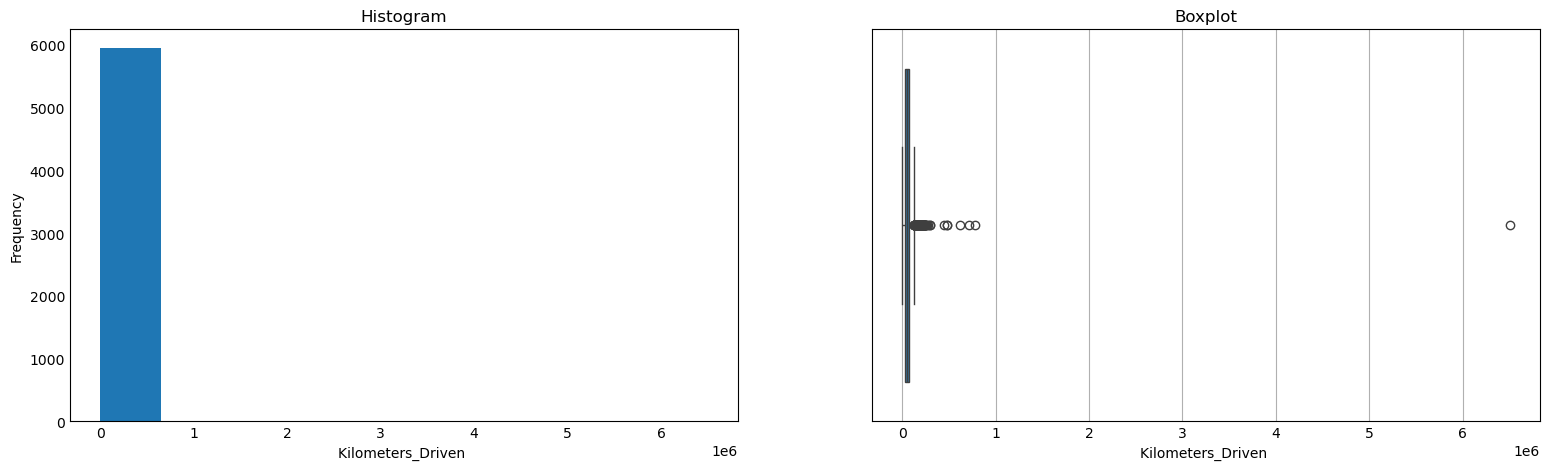

Skewness of "Mileage" is : -0.42


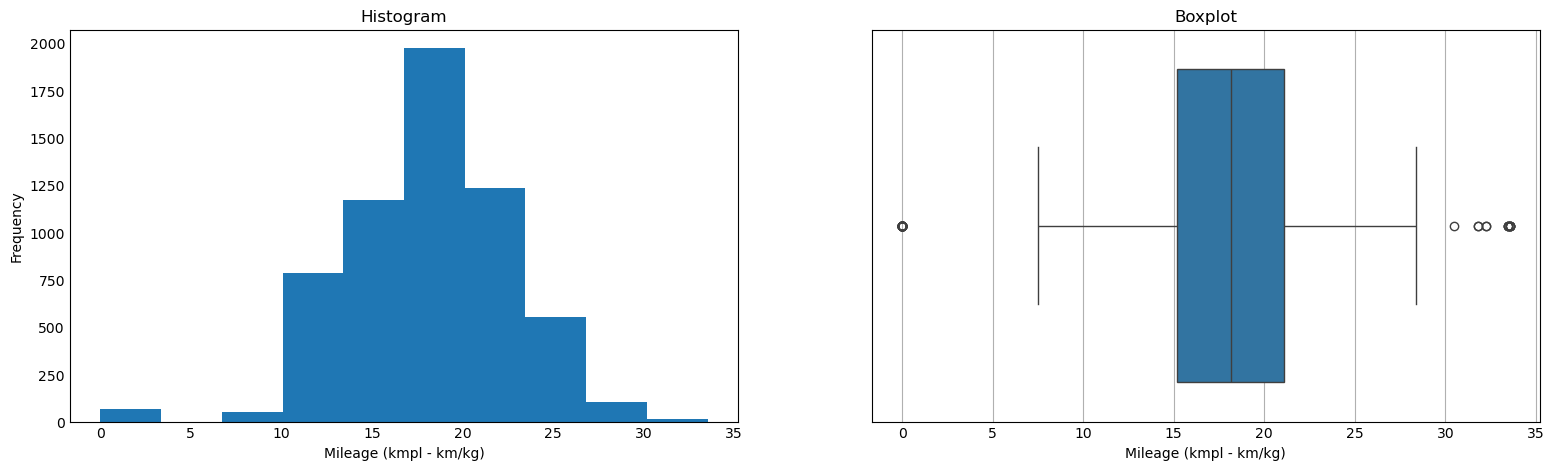

Skewness of "Engine" is : 1.41


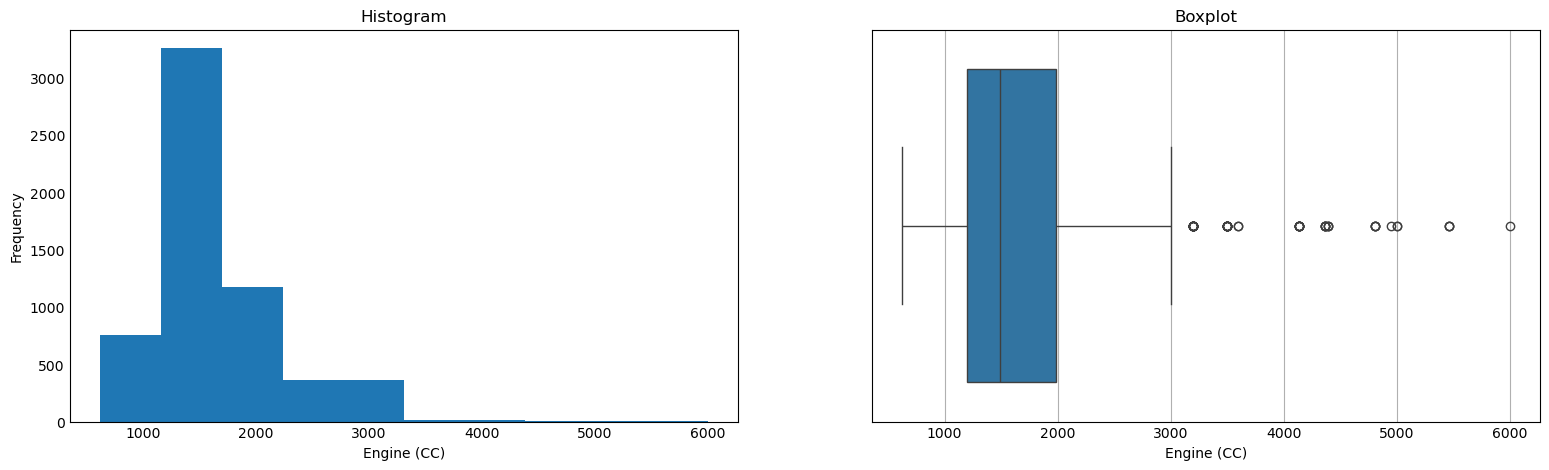

Skewness of "Power" is : 1.86


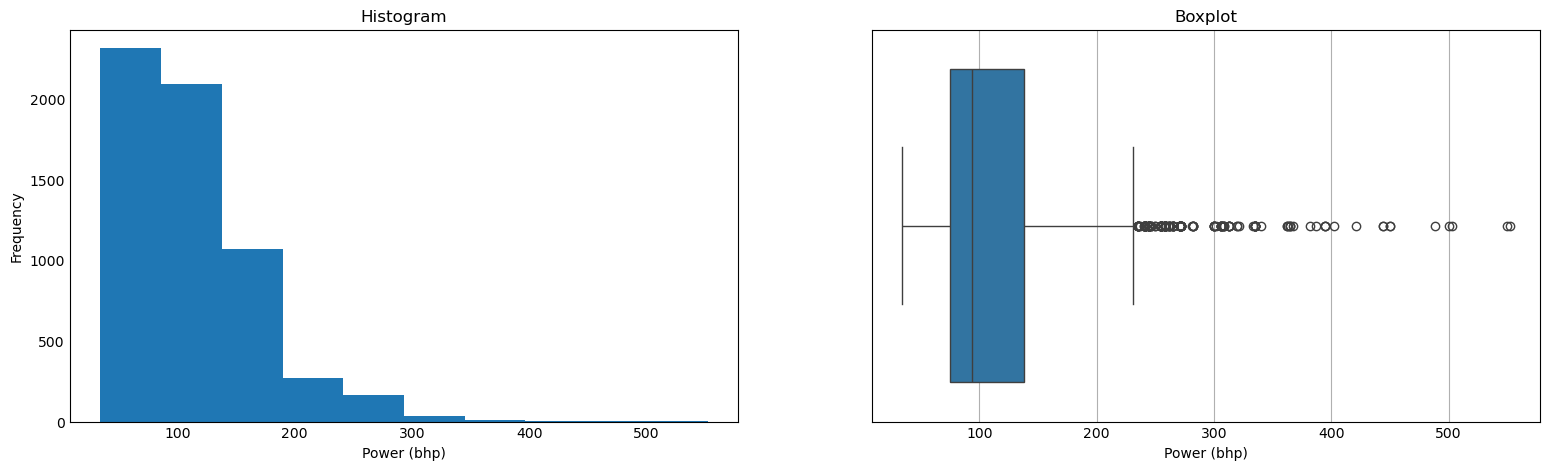

Skewness of "Seats" is : 1.9


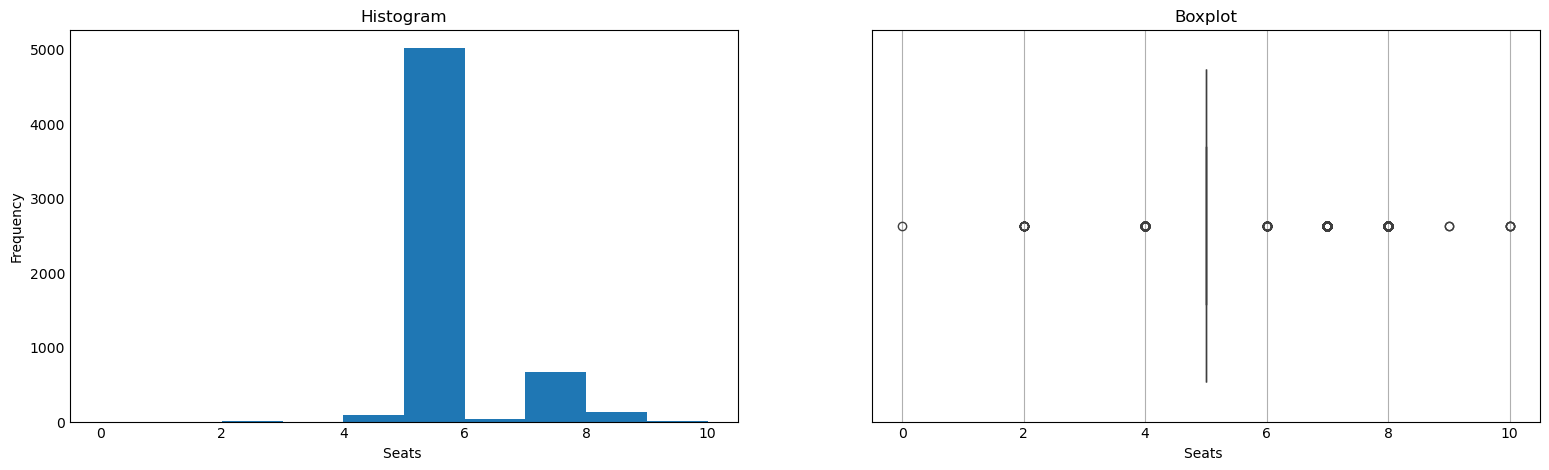

Skewness of "Resale_Price" is : 3.25


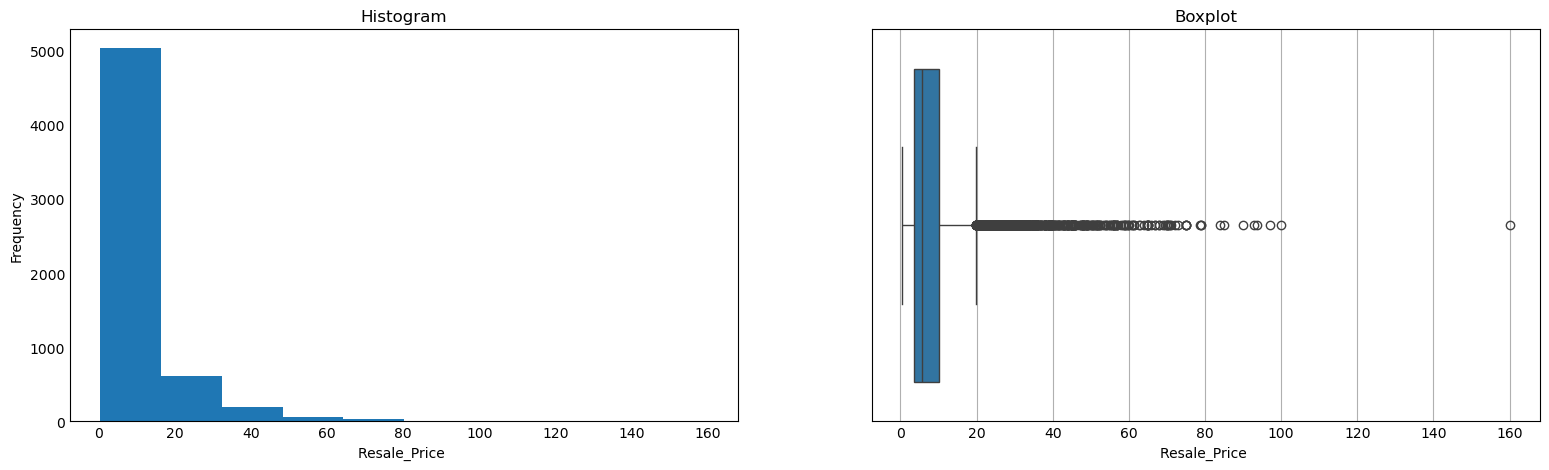

Skewness of "Car_Age" is : 0.84


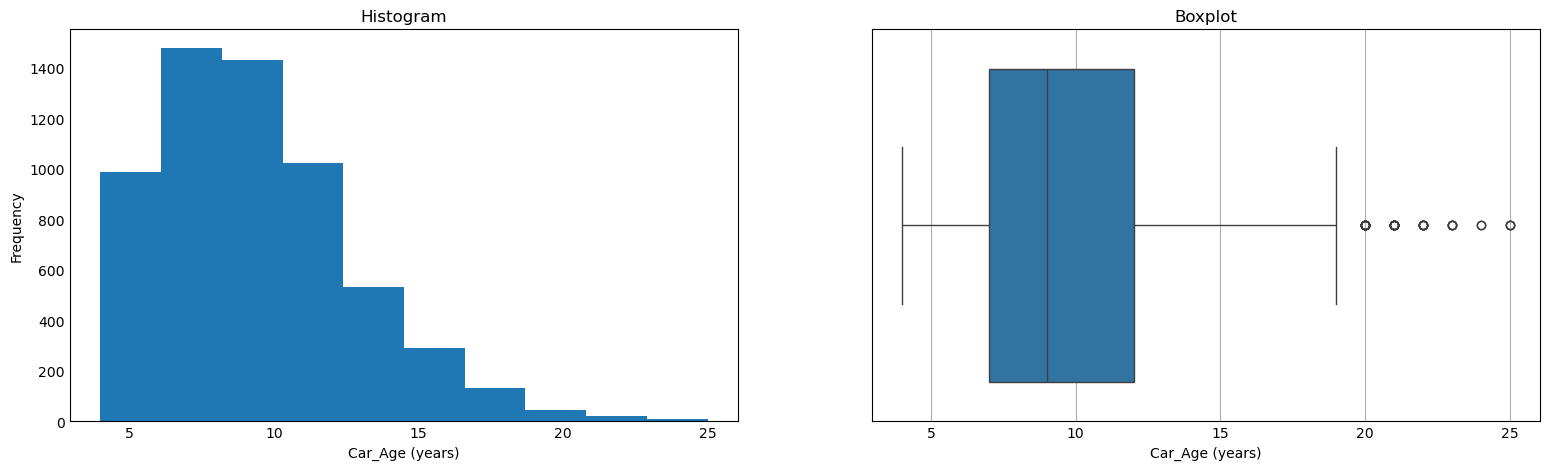

In [95]:
for num_variable in filtered_list_numerical:
    if num_variable == "Mileage":
        unit = "(kmpl - km/kg)"
    elif num_variable == "Engine":
        unit = "(CC)"
    elif num_variable == "Power":
        unit = "(bhp)"
    elif num_variable == "Car_Age":
        unit = "(years)"
    elif num_variable == "Resale_price":
        unit = "(lakh)"
    else:
        unit = ""
    print(f'Skewness of "{num_variable}" is :', round(df[num_variable].skew(), 2))
    plt.style.use("_mpl-gallery")
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title(f"Histogram")
    df[num_variable].hist(grid=False)
    plt.ylabel("Frequency")
    plt.xlabel(f"{num_variable} {unit}")
    plt.subplot(1,2,2)
    plt.title(f"Boxplot")
    sns.boxplot(x=df[num_variable])
    plt.xlabel(f"{num_variable} {unit}")
    plt.savefig(f"plots/univariate/{num_variable}.png", bbox_inches = "tight")
    plt.show()

__Numerical Data - Univariate Analysis Observation__ (Further to [Stats Summary](#summary-stats))
- __Km Driven:__ All values below 1Lakh km, data is heavily right skewed (Skewness = 61.58) <span style='color:green'>remove outliers over 10L km</span>
- __Mileage:__ Mileage is fairly symmetrical with few outliers below 5 <span style='color:green'>Impute outliers with 0.0 Value</span>
- __Engine:__ Engine capacity is moderately right skewed; few outliers over 5500cc <span style='color:green'>remove outliers above 5500 cc</span>
- __Power:__ Power is moderately right skewed;  outliers over 500 bhp <span style='color:green'>remove outliers above 550 bbhp</span>
- __Resale_Price:__ Heavily right skewed, 2 outliers above 1Cr value <span style='color:green'>remove outliers above 1Cr</span>
- __Car_Age:__ Fairly symmetrical in distribution; 1 model over 25 years of age <span style='color:green'>remove outliers above 25 Years</span>

### Dropping outlier rows

In [96]:
df.drop(df[df["Kilometers_Driven"]>=1000000].index, inplace= True)
df.drop(df[df["Engine"]>=5500].index, inplace= True)
df.drop(df[df["Power"]>550].index, inplace= True)
df.drop(df[df["Resale_Price"]>100].index, inplace= True)
df.drop(df[df["Car_Age"]>25].index, inplace= True)

In [97]:
df.loc[df["Mileage"] == 0, "Mileage"] = np.nan

## Dropping rows

# Handling 0 value of Mileage

In [ ]:
df.loc[df["Mileage"].isnull(), "Name"].value_counts().index.tolist()

In [ ]:
df["Mileage"].describe()

Mean and Median are broadly same, but fraught with outliers hence imputing null values with median <br>
using granular median at Brand and Model level to 

In [ ]:
medians = df.groupby(["Brand", "Model"])["Mileage"].transform("median")
df["Mileage"] = df["Mileage"].fillna(medians)

In [ ]:
df["Mileage"].isnull().sum()

There are 9 rows which still have Mileage as null

In [ ]:
# Grouping by Fuel Type, Power and Engine Capacity as they impact Mileage
medians = df.groupby(["Fuel_Type", "Power", "Engine"])["Mileage"].transform("median")
df["Mileage"] = df["Mileage"].fillna(medians)
df["Mileage"].isnull().sum()

There are 6 rows which still have Mileage as null

In [ ]:
# Grouping by Transmission, Brand for imputing remaining values for Mileage
medians = df.groupby(["Transmission", "Brand"])["Mileage"].transform("median")
df["Mileage"] = df["Mileage"].fillna(medians)
df["Mileage"].isnull().sum()

Leaves us with 1 missing values which may be dropped

In [ ]:
df.head()

In [ ]:
df.groupby(["Brand", "Model"])[["Mileage", "Power", "Engine"]].agg(["mean", "median"])

In [ ]:
df.groupby(["Brand", "Model"])["Mileage"]

In [ ]:
%who

Dropping rows with null values acros all Mileage, Power, Seats, Engine<br>
All these features have less than 1% missing values [Missing Value Info](#missing-values)

In [ ]:
df.loc[df["Seats"].isnull(), "Name"].value_counts()

In [ ]:
df.dropna(how= "all", subset=["Mileage", "Power", "Engine"], inplace = True)
df.head()

### Imputing with mean/median 

In [ ]:
df.shape

In [ ]:
filt2 = (df["Seats"]==0)
print(df.loc[filt2].shape)
df.loc[filt2]

In [ ]:
df.head()

In [ ]:
date.today().year

# Original DF

In [ ]:
df2 = pd.read_csv("data/used_cars_data.csv", index_col= "S.No.")

filt2 = df2["Kilometers_Driven"]>=500000
df2.loc[filt2]

In [ ]:
df2.shape